1. Import Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy.stats import norm
import yfinance as yf
import os

2. Load Data

In [3]:
##defining info (change in script)
stock_ticker = 'NVDA'
market_ticker = 'SPY'

start_date = '2022-01-01'
end_date = '2025-07-19'

##gathering data from yfinance
stock = yf.download(stock_ticker, start = start_date, end = end_date)
market = yf.download(market_ticker, start = start_date, end = end_date)

##creating folder for subsequent exports
folder_name = f'{stock_ticker}_VS_{market_ticker}_from_{start_date}_to_{end_date}'
output_path = os.path.join(os.getcwd(), folder_name)

if not os.path.exists(output_path):
    os.makedirs(output_path)

/var/folders/w8/51k91b9j1t36rs313h6xwd080000gn/T/ipykernel_93218/3020979252.py:9: FutureWarning: YF.download() has changed argument auto_adjust default to True
  stock = yf.download(stock_ticker, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed
/var/folders/w8/51k91b9j1t36rs313h6xwd080000gn/T/ipykernel_93218/3020979252.py:10: FutureWarning: YF.download() has changed argument auto_adjust default to True
  market = yf.download(market_ticker, start = start_date, end = end_date)
[*********************100%***********************]  1 of 1 completed


3. Analyze and Summarize Data

In [4]:
##calculating and add the daily returns to the df
stock['Daily Return'] = stock['Close'].pct_change()
market['Daily Return'] = market['Close'].pct_change()

##since they misalign, we must create a new df containing only daily returns
##from both that align and do not have NaNs
returns_df = pd.concat([stock['Daily Return'], market['Daily Return']], axis = 1).dropna()
returns_df.columns = [stock_ticker, market_ticker]

##computing descriptive statistics of the returns
stock_mean = returns_df[stock_ticker].mean()
stock_std = returns_df[stock_ticker].std()
stock_min = returns_df[stock_ticker].min()
stock_max = returns_df[stock_ticker].max()
stock_med = returns_df[stock_ticker].median()
stock_skew = returns_df[stock_ticker].skew()
stock_kurt = returns_df[stock_ticker].kurt()

market_mean = returns_df[market_ticker].mean()
market_std = returns_df[market_ticker].std()
market_min = returns_df[market_ticker].min()
market_max = returns_df[market_ticker].max()
market_med = returns_df[market_ticker].median()
market_skew = returns_df[market_ticker].skew()
market_kurt = returns_df[market_ticker].kurt()

##finding the correlation
stock_market_corr = returns_df[stock_ticker].corr(returns_df[market_ticker])

##now we want to create a new df with descriptive stats that is exportable
##first we define the data
data_desc_stats = {
  'Statistic': ['Mean', 'SD/Volatility', 'Min.', 'Max.', 'Median', 'Skewness', 'Kurtosis', 'Correlation'],
  stock_ticker: [stock_mean, stock_std, stock_min, stock_max, stock_med, stock_skew, stock_kurt, stock_market_corr],
  market_ticker: [market_mean, market_std, market_min, market_max, market_med, market_skew, market_kurt, stock_market_corr],
}

##creating the df and index the statistic
df_desc_stats = pd.DataFrame(data_desc_stats)
df_desc_stats = df_desc_stats.set_index('Statistic')
print(df_desc_stats)

##exporting the df to .csv
df_desc_stats.to_csv(os.path.join(output_path, 'desc_stats.csv'))

                   NVDA       SPY
Statistic                        
Mean           0.002586  0.000433
SD/Volatility  0.035298  0.011793
Min.          -0.169682 -0.058543
Max.           0.243696  0.105019
Median         0.003489  0.000525
Skewness       0.532865  0.390477
Kurtosis       4.445890  8.718212
Correlation    0.721366  0.721366


4. Visualize Data

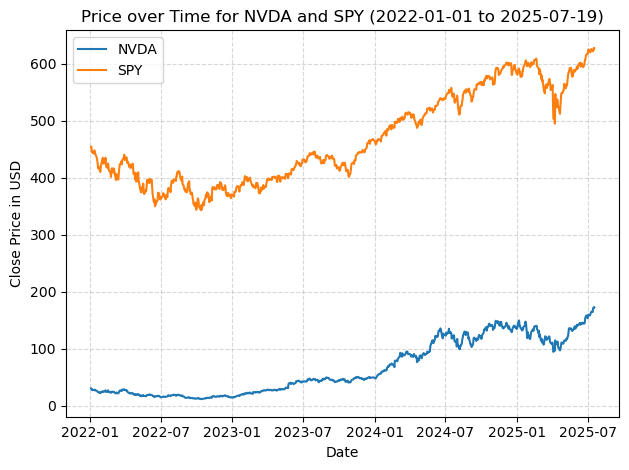

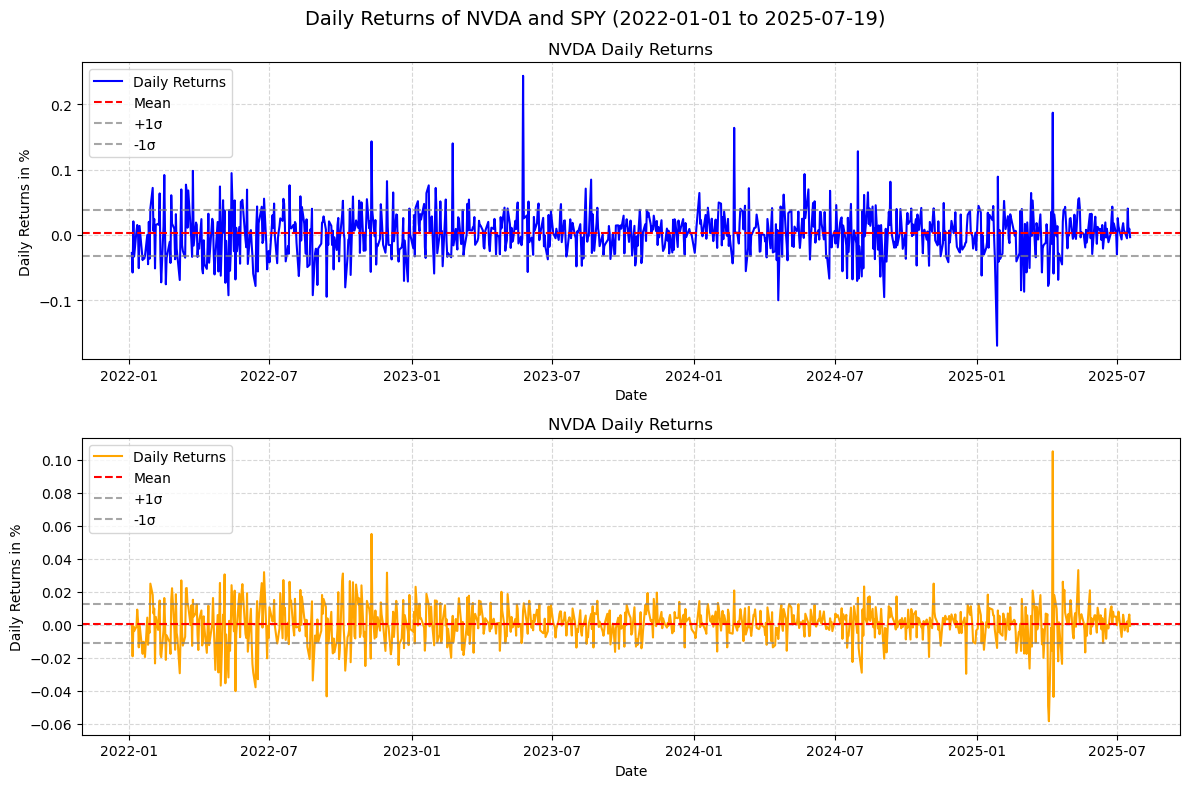

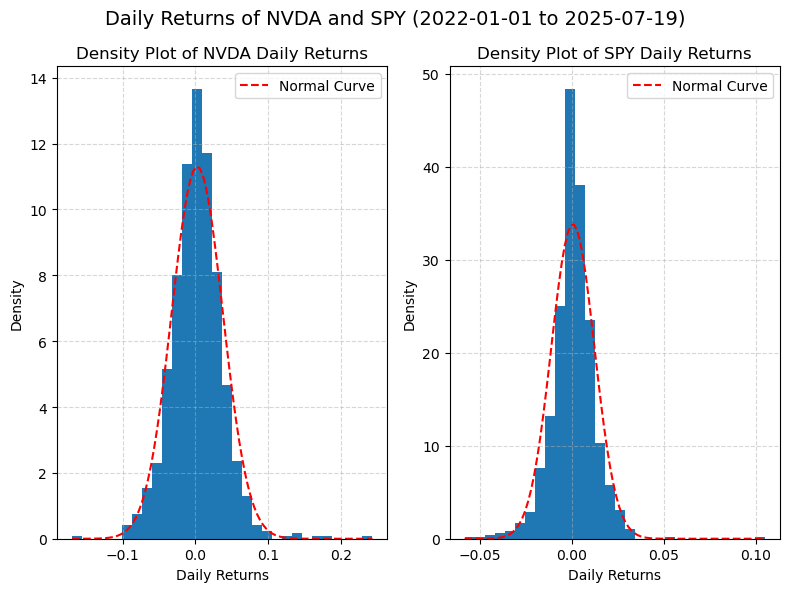

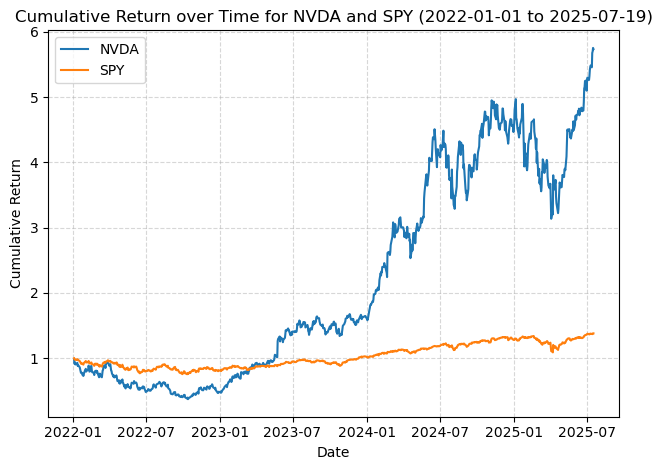

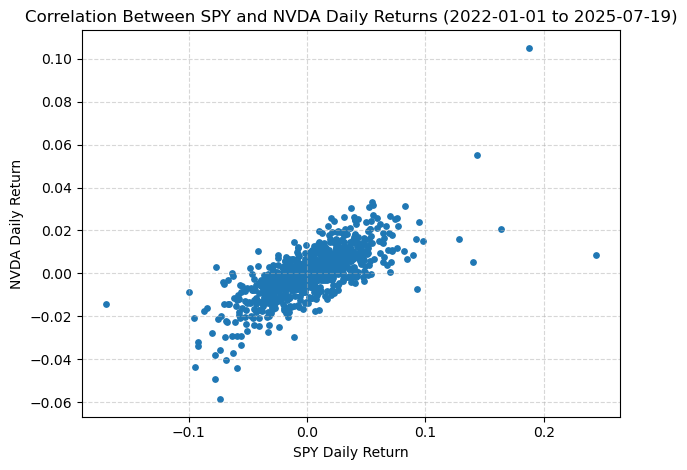

In [5]:
##using plt to make a plot showing price and date for both stock and market
##creating a figure with one x-axes and one y-axes in the standard size
fig, ax = plt.subplots()

##line chart for stock and market daily returns individually but in the same plot
ax.plot(stock.index, stock['Close'], label = stock_ticker)
ax.plot(market.index, market['Close'], label = market_ticker)

##fix labels
ax.set_xlabel('Date')
ax.set_ylabel('Close Price in USD')
ax.set_title(f'Price over Time for {stock_ticker} and {market_ticker} ({start_date} to {end_date})')
ax.legend()

##layout
ax.grid(True, linestyle = '--', alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig(os.path.join(output_path, 'price_chart.png'), dpi = 300, bbox_inches = 'tight')

plt.show()


##creating a plot with daily returns and date for stock and market individually
##creating a figure with 2 y-axes
fig, axes = plt.subplots(nrows = 2, ncols = 1, figsize = (12, 8))

##creating the separate subplots by defining the correct axes
axes[0].plot(returns_df.index, returns_df[stock_ticker], color = 'blue', label = 'Daily Returns')
axes[1].plot(returns_df.index, returns_df[market_ticker], color = 'orange', label = 'Daily Returns')

##adding respective means and SDs to plot and add legends
axes[0].axhline(stock_mean, color = 'red', linestyle = '--', label = 'Mean')
axes[0].axhline(stock_mean + stock_std, color = 'gray', linestyle = '--', alpha = 0.7, label = '+1σ')
axes[0].axhline(stock_mean - stock_std, color = 'gray', linestyle = '--', alpha = 0.7, label = '-1σ')
axes[0].legend(loc = 'upper left')
axes[1].axhline(market_mean, color = 'red', linestyle = '--', label = 'Mean')
axes[1].axhline(market_mean + market_std, color = 'gray', linestyle = '--', alpha = 0.7, label = '+1σ')
axes[1].axhline(market_mean - market_std, color = 'gray', linestyle = '--', alpha = 0.7, label = '-1σ')
axes[1].legend(loc = 'upper left')

##fix labels
fig.suptitle(f'Daily Returns of {stock_ticker} and {market_ticker} ({start_date} to {end_date})', fontsize = 14)

axes[0].set_xlabel('Date')
axes[0].set_ylabel('Daily Returns in %')
axes[0].set_title(f'{stock_ticker} Daily Returns')

axes[1].set_xlabel('Date')
axes[1].set_ylabel('Daily Returns in %')
axes[1].set_title(f'{stock_ticker} Daily Returns')

##layout
axes[0].grid(True, linestyle = "--", alpha = 0.5)
axes[1].grid(True, linestyle = "--", alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig(os.path.join(output_path, 'returns_chart.png'), dpi = 300, bbox_inches = 'tight')

plt.show()


##plotting histograms of daily returns for stock and market individually
##creating a figure with 2 x-axes
fig, axes = plt.subplots(nrows = 1, ncols = 2, figsize = (8, 6))

##creating the separate histograms
axes[0].hist(returns_df[stock_ticker], bins = 30, density = True)
axes[1].hist(returns_df[market_ticker], bins = 30, density = True)

##adding the normal curve to each histogram
stock_x = np.linspace(stock_min, stock_max, 100)
stock_pdf = norm.pdf(stock_x, stock_mean, stock_std)
axes[0].plot(stock_x, stock_pdf, color = 'red', linestyle = '--', label = 'Normal Curve')
axes[0].legend()

market_x = np.linspace(market_min, market_max, 100)
market_pdf = norm.pdf(market_x, market_mean, market_std)
axes[1].plot(market_x, market_pdf, color = 'red', linestyle = '--', label = 'Normal Curve')
axes[1].legend()

##fix labels
fig.suptitle(f'Daily Returns of {stock_ticker} and {market_ticker} ({start_date} to {end_date})', fontsize = 14)

axes[0].set_xlabel('Daily Returns')
axes[0].set_ylabel('Density')
axes[0].set_title(f'Density Plot of {stock_ticker} Daily Returns')

axes[1].set_xlabel('Daily Returns')
axes[1].set_ylabel('Density')
axes[1].set_title(f'Density Plot of {market_ticker} Daily Returns')

##layout
axes[0].grid(True, linestyle = "--", alpha = 0.5)
axes[1].grid(True, linestyle = "--", alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig(os.path.join(output_path, 'returns_hist.png'), dpi = 300, bbox_inches = 'tight')

plt.show()


##plotting the cumulative returns
##creating a figure
fig, ax = plt.subplots()

##calculating cumulative returns of each
returns_df['stock_cum'] = (returns_df[stock_ticker] + 1).cumprod()
returns_df['market_cum'] = (returns_df[market_ticker] + 1).cumprod()

##line chart for stock and market cumulative returns individually but in the same plot
ax.plot(returns_df.index, returns_df['stock_cum'], label = stock_ticker) 
ax.plot(returns_df.index, returns_df['market_cum'], label = market_ticker)

##fix labels
ax.set_xlabel('Date')
ax.set_ylabel('Cumulative Return')
ax.set_title(f'Cumulative Return over Time for {stock_ticker} and {market_ticker} ({start_date} to {end_date})')
ax.legend()

##layout
ax.grid(True, linestyle = '--', alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig(os.path.join(output_path, 'cumulative_return_chart.png'), dpi = 300, bbox_inches = 'tight')

plt.show()


##plotting the correlation between stock and market returns (beta)
##creating a figure
fig, ax = plt.subplots()

##scatterplot of daily returns
ax.scatter(returns_df[stock_ticker], returns_df[market_ticker], s = 15)
##ideally would add a linear regression line with slope (beta) to my plot, but a bit above my current level

##fix labels
ax.set_xlabel(f'{market_ticker} Daily Return')
ax.set_ylabel(f'{stock_ticker} Daily Return')
ax.set_title(f'Correlation Between {market_ticker} and {stock_ticker} Daily Returns ({start_date} to {end_date})')

##layout
ax.grid(True, linestyle = '--', alpha = 0.5)
fig.tight_layout()

##save figure as .png
fig.savefig(os.path.join(output_path, 'returns_correlation.png'), dpi = 300, bbox_inches = 'tight')

plt.show()

6. Estimate CAPM Regression

In [6]:
##we run OLS using sm to generate MSFT's historic alpha and beta
##as according to the CAPM regressionusing daily returns

##first we add a constant to our independent, SPY
CAPM_X = sm.add_constant(returns_df[market_ticker])
CAPM_y = returns_df[stock_ticker]

##now we model the OLS and extract results
CAPM_model = sm.OLS(CAPM_y, CAPM_X).fit()
CAPM_result = CAPM_model.summary()
print(CAPM_result)


##now we want to create a new df with regression results that is exportable
##first we define the data
data_CAPM_result = {
  "Coefficient": ['Alpha', 'Beta', 'R2', 'Adj. R2', 'N'],
  "Estimate": [CAPM_model.params['const'], CAPM_model.params[market_ticker], CAPM_model.rsquared, CAPM_model.rsquared_adj, CAPM_model.nobs],
  "p-value": [CAPM_model.pvalues['const'], CAPM_model.pvalues[market_ticker], None, None, None],
}

##creating the df and index the statistic
df_CAPM_result = pd.DataFrame(data_CAPM_result)
df_CAPM_result = df_CAPM_result.set_index('Coefficient')
df_CAPM_result = df_CAPM_result.round(4)
print(df_CAPM_result)

##exporting the df to .csv
df_CAPM_result.to_csv(os.path.join(output_path, 'CAPM_regression.csv'))

                            OLS Regression Results                            
Dep. Variable:                   NVDA   R-squared:                       0.520
Model:                            OLS   Adj. R-squared:                  0.520
Method:                 Least Squares   F-statistic:                     960.2
Date:                Sat, 19 Jul 2025   Prob (F-statistic):          2.35e-143
Time:                        15:11:43   Log-Likelihood:                 2033.8
No. Observations:                 887   AIC:                            -4064.
Df Residuals:                     885   BIC:                            -4054.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0017      0.001      2.009      0.0